In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Goodreadss Books.csv')
df.head()

,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,...,publish_date,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",...,September 16th 2006,652.0,2553909.0,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,September 2004,870.0,2631427.0,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",...,November 1st 2003,309.0,7434783.0,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",...,November 1st 2003,352.0,2878196.0,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",...,May 1st 2004,435.0,2972519.0,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0


Data Preprocessing

In [3]:
df.columns

Index(['Unnamed: 0', 'bookId', 'title', 'author', 'series', 'description',
       'genres', 'awards', 'characters', 'places', 'isbn', 'isbn13',
       'language', 'first_publish_date', 'publish_date', 'num_pages',
       'num_ratings', 'num_reviews', 'avg_rating', 'rated_1', 'rated_2',
       'rated_3', 'rated_4', 'rated_5'],
      dtype='object')

In [4]:
df = df.drop(columns=['Unnamed: 0','series','awards','isbn','isbn13','first_publish_date','num_pages','rated_1','rated_2','rated_3',
                     'rated_4','rated_5','num_ratings','num_reviews'])
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57
1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50
2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48
3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43
4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57


In [5]:
df['title'].unique()

array(['Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       "Harry Potter and the Sorcerer's Stone", ..., 'The Porcelain Dove',
       'The Fall Of The Kings', 'Die Blume der Diener'], dtype=object)

In [6]:
df['author'].unique()

array(['J.K. Rowling', 'J.K. Rowling,Mary GrandPré',
       'W. Frederick Zimmerman', ...,
       'Delia Sherman,Cortney Skinner,Ellen Kushner',
       'Ellen Kushner,Delia Sherman', 'Delia Sherman,Michael Siefener'],
      dtype=object)

In [7]:
df.isna().sum()

bookId              0
title             559
author            561
description      2687
genres            256
characters      15289
places          16028
language         2779
publish_date     1046
avg_rating        559
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

bookId          0
title           0
author          0
description     0
genres          0
characters      0
places          0
language        0
publish_date    0
avg_rating      0
dtype: int64

In [10]:
df = df.drop_duplicates(subset=['title'])

In [11]:
df = df.reset_index(drop=True)
df['bookId'] = df.index
df

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Master of the Night,Angela Knight,American agent Erin Grayson is assigned to sed...,"Art,Biography,Business,Children's,Christian,Cl...","Erin Grayson,Reece Champion","Atlanta, Georgia",English,October 5th 2004,3.88
1791,1791,Jane's Warlord,Angela Knight,"The next target of a time traveling killer, cr...","Art,Biography,Business,Children's,Christian,Cl...","Jane Colby,Baran Arvid",South Carolina,English,June 1st 2004,3.97
1792,1792,Blame it on the Blackout,Heidi Betts,Blame It on the Blackout by Heidi Betts releas...,"Art,Biography,Business,Children's,Christian,Cl...","Lucy Grainger,Peter Reynolds",United States of America,English,June 2005,3.54
1793,1793,Walker's Widow,Heidi Betts,Clayton Walker is assigned to solve a string o...,"Art,Biography,Business,Children's,Christian,Cl...","Regan Doyle,Clayton Walker",United States of America,English,January 8th 2002,4.10


In [12]:
df.to_csv('data_after_preprocessing.csv')

In [13]:
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57


In [14]:
df['language'].value_counts()

English                   1533
Spanish                    144
German                      56
French                      34
Chinese                      5
Portuguese                   4
Italian                      4
Multiple languages           4
Russian                      3
Arabic                       2
Turkish                      1
Japanese                     1
Danish                       1
Latin                        1
Dutch                        1
Greek, Ancient to 1453       1
Name: language, dtype: int64

In [15]:
df['metadata_soup'] = df['title'] + ' ' + df['author'] + ' ' + df['description'] + ' ' + df['genres']

In [16]:
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating,metadata_soup
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57,Harry Potter and the Half-Blood Prince J.K. Ro...
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50,Harry Potter and the Order of the Phoenix J.K....
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48,Harry Potter and the Sorcerer's Stone J.K. Row...
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43,Harry Potter and the Chamber of Secrets J.K. R...
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57,Harry Potter and the Prisoner of Azkaban J.K. ...


In [17]:
df['metadata_soup'] = df['metadata_soup'].apply(lambda x: x.lower())
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating,metadata_soup
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57,harry potter and the half-blood prince j.k. ro...
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50,harry potter and the order of the phoenix j.k....
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48,harry potter and the sorcerer's stone j.k. row...
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43,harry potter and the chamber of secrets j.k. r...
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57,harry potter and the prisoner of azkaban j.k. ...


In [18]:
import string
import re
#tokenizing
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#melakukan remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

#nltk word tokenize
def word_tokenize_wrapper(text):
    return nltk.tokenize.word_tokenize(text)

def remove_number(text):
    return re.sub(r"\d+", "", text)

In [19]:
from nltk.corpus import stopwords

def filtering_stopword(text):
    # get Indonesian stopword 
    list_stopwords = set(stopwords.words('english'))
    #remove stopword pada list token
    tokens_without_stopword = [word for word in text if not word in list_stopwords]
    return tokens_without_stopword

def join_text(text):
    text = ' '.join(text)
    return text

In [20]:
df['metadata_soup'] = df['metadata_soup'].apply(remove_number)
df['metadata_soup'] = df['metadata_soup'].apply(remove_punctuation)
df['metadata_soup'] = df['metadata_soup'].apply(remove_single_char)
df['metadata_soup'] = df['metadata_soup'].apply(word_tokenize_wrapper)

In [21]:
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating,metadata_soup
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57,"[harry, potter, and, the, halfblood, prince, j..."
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50,"[harry, potter, and, the, order, of, the, phoe..."
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48,"[harry, potter, and, the, sorcerers, stone, jk..."
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43,"[harry, potter, and, the, chamber, of, secrets..."
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57,"[harry, potter, and, the, prisoner, of, azkaba..."


In [22]:
df['metadata_soup'] = df['metadata_soup'].apply(filtering_stopword)
df['metadata_soup'] = df['metadata_soup'].apply(join_text)

In [23]:
df.head()

,bookId,title,author,description,genres,characters,places,language,publish_date,avg_rating,metadata_soup
0,0,Harry Potter and the Half-Blood Prince,J.K. Rowling,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",English,September 16th 2006,4.57,harry potter halfblood prince jk rowling war v...
1,1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,September 2004,4.50,harry potter order phoenix jk rowlingmary gran...
2,2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",English,November 1st 2003,4.48,harry potter sorcerers stone jk rowlingmary gr...
3,3,Harry Potter and the Chamber of Secrets,J.K. Rowling,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...","Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",English,November 1st 2003,4.43,harry potter chamber secrets jk rowling dursle...
4,4,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré","For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...","Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",English,May 1st 2004,4.57,harry potter prisoner azkaban jk rowlingmary g...


In [24]:
# Saving indexes in a series
indices = pd.Series(df.index,index=df['title'])

# Using Count Vectorizer
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df['metadata_soup'])

In [25]:
# tfidf_matrix

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
df.description

0       The war against Voldemort is not going well; e...
1       There is a door at the end of a silent corrido...
2       Harry Potter's life is miserable. His parents ...
3       The Dursleys were so mean and hideous that sum...
4       For twelve long years, the dread fortress of A...
                              ...                        
1790    American agent Erin Grayson is assigned to sed...
1791    The next target of a time traveling killer, cr...
1792    Blame It on the Blackout by Heidi Betts releas...
1793    Clayton Walker is assigned to solve a string o...
1794    HIS PREGNANT MISTRESS,,She was his kept woman....
Name: description, Length: 1795, dtype: object

In [28]:
cosine_sim_cv = cosine_similarity(count_matrix,count_matrix)

In [29]:
indices

title
Harry Potter and the Half-Blood Prince          0
Harry Potter and the Order of the Phoenix       1
Harry Potter and the Sorcerer's Stone           2
Harry Potter and the Chamber of Secrets         3
Harry Potter and the Prisoner of Azkaban        4
                                             ... 
Master of the Night                          1790
Jane's Warlord                               1791
Blame it on the Blackout                     1792
Walker's Widow                               1793
Mr. and Mistress                             1794
Length: 1795, dtype: int64

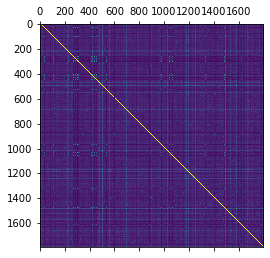

<Figure size 7200x7200 with 0 Axes>

In [30]:
plt.matshow(cosine_sim_cv)
plt.figure(figsize=(100, 100))
plt.show()

In [31]:
def content_based_recommender(title,cosine_sim_cv=cosine_sim_cv,df=df,indices=indices):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_cv[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1],reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    print(sim_scores)
    return df[['title','author']].iloc[book_indices]

In [32]:
content_based_recommender("Harry Potter and the Half-Blood Prince")

[(3, 0.3520821503974708), (388, 0.29938207967349956), (1437, 0.29462782549439476), (288, 0.2847473987257497), (2, 0.277128548309331), (207, 0.2668802563418119), (1, 0.2607367234947632), (381, 0.2567180154051351), (5, 0.24992821248954653), (974, 0.24879683041748893)]


,title,author
3,Harry Potter and the Chamber of Secrets,J.K. Rowling
388,Harry Potter and the Philosopher's Stone,J.K. Rowling
1437,Harrius Potter et Camera Secretorum,"J.K. Rowling,Peter Needham"
288,Harry Potter Y La Piedra Filosofal,J.K. Rowling
2,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré"
207,Moby-Dick,Herman Melville
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré"
381,Der Vorleser,Bernhard Schlink
5,Harry Potter and the Goblet of Fire,"J.K. Rowling,Mary GrandPré"
974,P.S. I Love You,Cecelia Ahern


In [33]:
import pickle
pickle.dump(df,open('book.pkl','wb'))
pickle.dump(df.to_dict(),open('book_dict.pkl','wb'))
pickle.dump(cosine_sim_cv,open('similarity.pkl','wb'))